In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import os 
data_path = os.path.join("..", "data", "Supplementary Information File 2 (SIF-2).xlsx")
print (data_path)
# os.listdir(data_path)

..\data\Supplementary Information File 2 (SIF-2).xlsx


In [6]:

df = pd.read_excel(data_path)
df.head()

,S.No,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,81,AgBiO3,Ag,Bi,False,rhombohedral,1,5,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857
1,107,AgMoO3,Ag,Mo,False,cubic,1,5,1.28,0.95,0.61,1.93,2.16,2.761453,1.789300,-1.663536,0.942809,4.126280,0.435714
2,109,AgNbO3,Ag,Nb,True,rhombohedral,1,5,1.28,0.95,0.64,1.93,1.60,2.761453,1.955055,-1.972571,0.928944,4.072890,0.457143
3,122,AgReO3,Ag,Re,False,cubic,1,5,1.28,0.95,0.58,1.93,1.90,2.761453,1.987971,-1.729357,0.957094,4.201732,0.414286
4,125,AgSbO3,Ag,Sb,True,orthorhombic,1,5,1.28,0.95,0.60,1.93,2.05,2.761453,2.075849,-1.696143,0.947523,4.148925,0.428571


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               675 non-null    int64  
 1   Compound           675 non-null    object 
 2   A                  675 non-null    object 
 3   B                  675 non-null    object 
 4   In literature      675 non-null    bool   
 5   Lowest distortion  675 non-null    object 
 6   v(A)               675 non-null    int64  
 7   v(B)               675 non-null    int64  
 8   r(AXII)(Å)         675 non-null    float64
 9   r(AVI)(Å)          675 non-null    float64
 10  r(BVI)(Å)          675 non-null    float64
 11  EN(A)              675 non-null    float64
 12  EN(B)              675 non-null    float64
 13  l(A-O)(Å)          675 non-null    float64
 14  l(B-O)(Å)          675 non-null    float64
 15  ΔENR               675 non-null    float64
 16  tG                 675 non

In [7]:
data=df.copy()

In [8]:
# drop the compound, A, B, In literature, s.no
data.drop(['S.No', 'Compound', 'A', 'B', 'In literature'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lowest distortion  675 non-null    object 
 1   v(A)               675 non-null    int64  
 2   v(B)               675 non-null    int64  
 3   r(AXII)(Å)         675 non-null    float64
 4   r(AVI)(Å)          675 non-null    float64
 5   r(BVI)(Å)          675 non-null    float64
 6   EN(A)              675 non-null    float64
 7   EN(B)              675 non-null    float64
 8   l(A-O)(Å)          675 non-null    float64
 9   l(B-O)(Å)          675 non-null    float64
 10  ΔENR               675 non-null    float64
 11  tG                 675 non-null    float64
 12  τ                  675 non-null    float64
 13  μ                  675 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 74.0+ KB


In [9]:
data.head()

,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,rhombohedral,1,5,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857
1,cubic,1,5,1.28,0.95,0.61,1.93,2.16,2.761453,1.789300,-1.663536,0.942809,4.126280,0.435714
2,rhombohedral,1,5,1.28,0.95,0.64,1.93,1.60,2.761453,1.955055,-1.972571,0.928944,4.072890,0.457143
3,cubic,1,5,1.28,0.95,0.58,1.93,1.90,2.761453,1.987971,-1.729357,0.957094,4.201732,0.414286
4,orthorhombic,1,5,1.28,0.95,0.60,1.93,2.05,2.761453,2.075849,-1.696143,0.947523,4.148925,0.428571


In [10]:
# send the lowest distortion column at the end
distortion= data['Lowest distortion']

# move the column to the end
data = data.drop(['Lowest distortion'], axis=1)#.join(distortion)


In [11]:
data.head()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1,5,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857
1,1,5,1.28,0.95,0.61,1.93,2.16,2.761453,1.789300,-1.663536,0.942809,4.126280,0.435714
2,1,5,1.28,0.95,0.64,1.93,1.60,2.761453,1.955055,-1.972571,0.928944,4.072890,0.457143
3,1,5,1.28,0.95,0.58,1.93,1.90,2.761453,1.987971,-1.729357,0.957094,4.201732,0.414286
4,1,5,1.28,0.95,0.60,1.93,2.05,2.761453,2.075849,-1.696143,0.947523,4.148925,0.428571


In [41]:
data.describe()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,2.386667,3.613333,1.257185,0.980059,0.689081,1.319452,1.784000,2.603896,2.021722,-2.115625,0.900392,3.468194,0.492201
std,0.724804,0.724804,0.182602,0.143080,0.098175,0.365109,0.366429,0.138668,0.154383,0.377787,0.063108,1.289246,0.070125
min,1.000000,2.000000,0.900000,0.620000,0.580000,0.790000,1.100000,2.233563,1.745600,-3.241429,0.820006,-2.238066,0.414286
25%,2.000000,3.000000,1.110000,0.900000,0.620000,1.120000,1.500000,2.536253,1.955055,-2.314446,0.849197,2.824026,0.442857
50%,2.000000,4.000000,1.270000,0.950000,0.650000,1.200000,1.830000,2.577786,2.005574,-2.015821,0.883038,3.821751,0.464286
75%,3.000000,4.000000,1.360000,1.020000,0.720000,1.380000,2.160000,2.653977,2.075849,-1.836250,0.942809,4.229004,0.514286
max,4.000000,5.000000,1.880000,1.670000,0.980000,2.330000,2.360000,3.300176,2.488353,-1.426143,1.097599,5.863777,0.700000


In [42]:
data.isnull().sum()

v(A)          0
v(B)          0
r(AXII)(Å)    0
r(AVI)(Å)     0
r(BVI)(Å)     0
EN(A)         0
EN(B)         0
l(A-O)(Å)     0
l(B-O)(Å)     0
ΔENR          0
tG            0
τ             0
μ             0
dtype: int64

In [47]:
distortion

0      rhombohedral
1             cubic
2      rhombohedral
3             cubic
4      orthorhombic
           ...     
670    orthorhombic
671    orthorhombic
672    orthorhombic
673    orthorhombic
674           cubic
Name: Lowest distortion, Length: 675, dtype: object

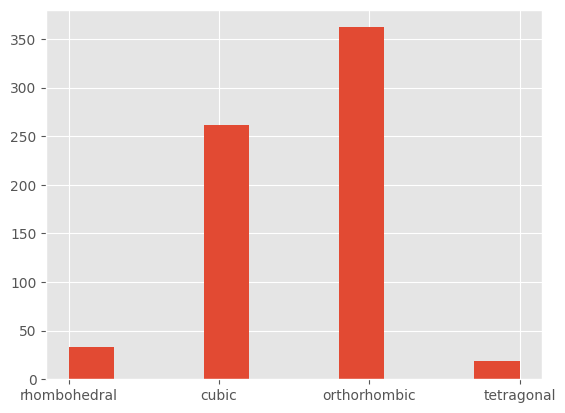

In [48]:
distortion.hist()
plt.style.use('ggplot')


<Axes: >

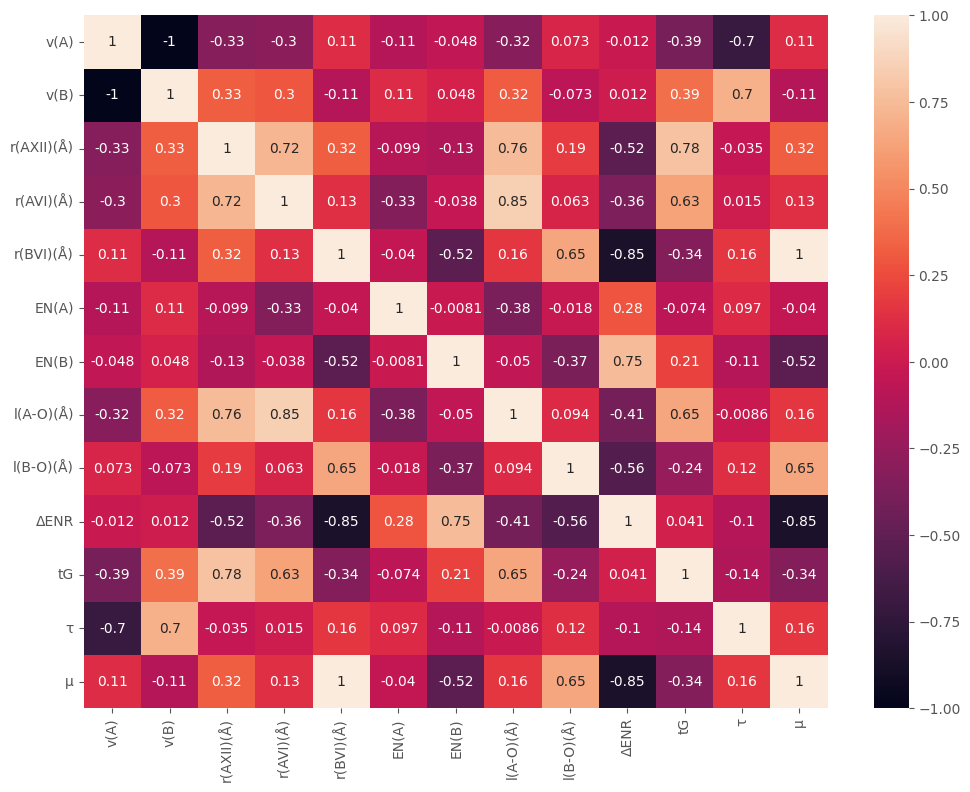

In [44]:
correlations= data.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(correlations,annot=True)

## Test Train split

In [12]:
from sklearn.model_selection import train_test_split
X = data
y = distortion

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=108)

## Random Forest

In [83]:
# Random forest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
def RF_Model (X_train, y_train , norm_func = None):
    if norm_func is None:
        norm_func = lambda x : x    # noqa: E731

    model = RandomForestClassifier(n_estimators=1400, max_depth=40, #max_features='auto',
                                criterion='entropy', min_samples_leaf=1, min_samples_split=2,
                                    random_state=108)
    model.fit(X_train, y_train)
    return model

In [ ]:
RF_model = RF_Model(X_train, y_train)
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))

In [53]:
model.score(X_test, y_test)

0.8074074074074075

## Feature importance


Feature: 0, Score: 0.02206
Feature: 1, Score: 0.02191
Feature: 2, Score: 0.06676
Feature: 3, Score: 0.06681
Feature: 4, Score: 0.06200
Feature: 5, Score: 0.09284
Feature: 6, Score: 0.10881
Feature: 7, Score: 0.06695
Feature: 8, Score: 0.08033
Feature: 9, Score: 0.10194
Feature: 10, Score: 0.11918
Feature: 11, Score: 0.12685
Feature: 12, Score: 0.06357


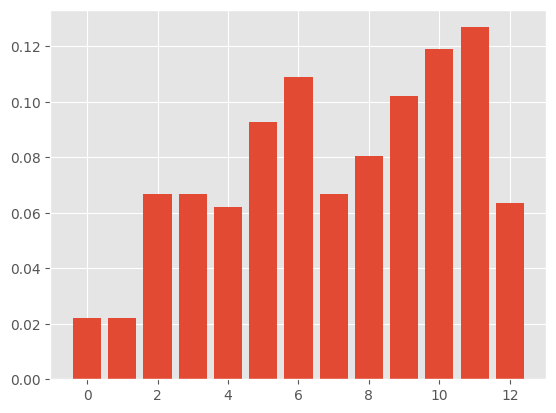

In [52]:
importance= model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Decision Tree

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
DT_model = DecisionTreeClassifier()

In [13]:
DT_model.fit(X_train,y_train)
DT_model.score(X_test,y_test)

0.7111111111111111

Feature: 0, Score: 0.01704
Feature: 1, Score: 0.02334
Feature: 2, Score: 0.06835
Feature: 3, Score: 0.11241
Feature: 4, Score: 0.01856
Feature: 5, Score: 0.08690
Feature: 6, Score: 0.11171
Feature: 7, Score: 0.04484
Feature: 8, Score: 0.11387
Feature: 9, Score: 0.12148
Feature: 10, Score: 0.09272
Feature: 11, Score: 0.18878
Feature: 12, Score: 0.00000


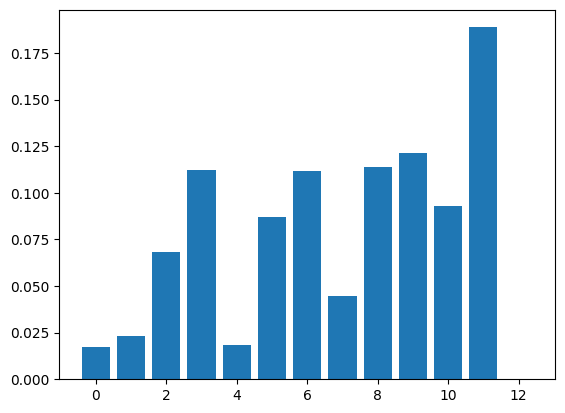

In [14]:
importance = DT_model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [15]:
predictions = DT_model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       cubic       0.65      0.78      0.71        46
orthorhombic       0.81      0.72      0.76        76
rhombohedral       0.38      0.33      0.35         9
  tetragonal       0.50      0.50      0.50         4

    accuracy                           0.71       135
   macro avg       0.58      0.58      0.58       135
weighted avg       0.72      0.71      0.71       135



In [17]:
print(confusion_matrix(y_test,predictions))

[[36  7  2  1]
 [18 55  3  0]
 [ 0  5  3  1]
 [ 1  1  0  2]]


## K Fold validation

In [21]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 5)

In [22]:
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [32]:
X = data.to_numpy()
y = distortion.to_numpy()

In [41]:
print(f"Data : {X.shape} \nLabel: {y.shape}\n")
for train , val in kfold.split(X, y):
    print(f"Train: {train.shape} \nTest : {val.shape}\nTotal: {train.shape[0] + val.shape[0]}\n")
    print(f"data : {X[train].shape} \nlabel: {y[val].shape}\n")

Data : (675, 13) 
Label: (675,)

Train: (540,) 
Test : (135,)
Total: 675

data : (540, 13) 
label: (135,)

Train: (540,) 
Test : (135,)
Total: 675

data : (540, 13) 
label: (135,)

Train: (540,) 
Test : (135,)
Total: 675

data : (540, 13) 
label: (135,)

Train: (540,) 
Test : (135,)
Total: 675

data : (540, 13) 
label: (135,)

Train: (540,) 
Test : (135,)
Total: 675

data : (540, 13) 
label: (135,)



## XGBoost

In [42]:
import xgboost as xgb


In [63]:
def XGB_Model_func(x , y , norm_func = None , n_estimators = 100):
    if norm_func is None:
        norm_func = lambda x : x    # noqa: E731
    
    # Define the XGBoost model with a linear objective function
    xgb_model = xgb.XGBClassifier(
        # objective='reg:linear',  # Linear objective function
        max_depth=12,
        learning_rate=0.25,
        # n_estimators=n_estimators,
        # n_jobs=-1
        gamma = 0.1,
        objective = 'multi:softprob'

    )
    
    # Train the model on the training data
    xgb_model.fit(norm_func(x), y)
    
    return xgb_model

<class 'pandas.core.series.Series'>
RangeIndex: 675 entries, 0 to 674
Series name: Lowest distortion
Non-Null Count  Dtype 
--------------  ----- 
675 non-null    object
dtypes: object(1)
memory usage: 5.4+ KB


In [58]:
y_train.to_numpy()

array(['cubic', 'orthorhombic', 'cubic', 'cubic', 'orthorhombic',
       'orthorhombic', 'orthorhombic', 'cubic', 'orthorhombic', 'cubic',
       'cubic', 'cubic', 'orthorhombic', 'cubic', 'orthorhombic',
       'orthorhombic', 'orthorhombic', 'orthorhombic', 'orthorhombic',
       'cubic', 'orthorhombic', 'cubic', 'orthorhombic', 'orthorhombic',
       'orthorhombic', 'orthorhombic', 'cubic', 'orthorhombic',
       'tetragonal', 'orthorhombic', 'cubic', 'orthorhombic', 'cubic',
       'orthorhombic', 'cubic', 'orthorhombic', 'orthorhombic', 'cubic',
       'orthorhombic', 'orthorhombic', 'cubic', 'orthorhombic',
       'rhombohedral', 'cubic', 'cubic', 'rhombohedral', 'cubic',
       'orthorhombic', 'orthorhombic', 'orthorhombic', 'orthorhombic',
       'cubic', 'orthorhombic', 'orthorhombic', 'tetragonal', 'cubic',
       'orthorhombic', 'orthorhombic', 'orthorhombic', 'orthorhombic',
       'orthorhombic', 'orthorhombic', 'orthorhombic', 'cubic', 'cubic',
       'cubic', 'orthorhomb

In [70]:
def to_num(y_train):
    n = y_train.shape[0]
    y_train_np = y_train.to_numpy()
    y_train_num = np.zeros((n,))
    leftout = 0
    for i in range(n):
        if y_train_np[i] == 'cubic':
            y_train_num[i] = 1
        elif y_train_np[i] == 'rhombohedral':
            y_train_num[i] = 4
        elif y_train_np[i] == 'tetragonal':
            y_train_num[i] = 2
        elif y_train_np[i] == 'orthorhombic':
            y_train_num[i] = 3
        else:
            leftout+=1

    # leftout

    return y_train_num-1




In [71]:
y_train_num= to_num(y_train)

In [76]:
XGB_model=XGB_Model_func(X_train,y_train_num)
XGB_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [77]:
predictions = XGB_model.predict(X_test)
print(classification_report(to_num(y_test),predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82        46
         1.0       0.00      0.00      0.00         4
         2.0       0.83      0.86      0.84        76
         3.0       0.50      0.22      0.31         9

    accuracy                           0.79       135
   macro avg       0.53      0.49      0.49       135
weighted avg       0.76      0.79      0.77       135



In [79]:
from imblearn.over_sampling import SMOTE
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# Create a sample multiclass imbalanced dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_redundant=0, n_repeated=0, n_classes=5, n_clusters_per_class=1, weights=[0.1, 0.2, 0.3, 0.2, 0.2], random_state=42)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SMOTE object with k=5 and ratio=1
smote = SMOTE()

# Oversample the minority classes
X_res, y_res = smote.fit_resample(X_train, y_train)
print(f"X_res = {X_res.shape}")
print(f"y_res = {y_res.shape}/n")
# Print the new class distribution
# print("Original class distribution:", np.unique(y_train, return_counts=True))
# print("Oversampled class distribution:", np.unique(y_res, return_counts=True))

XGB_model_S = XGB_Model_func(X_res,to_num(y_res))

X_res = (1144, 13)
y_res = (1144,)/n


In [80]:
X_res

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,2,4,1.090000,0.960000,0.690000,1.250000,1.960000,2.411516,2.052287,-1.963536,0.842438,4.938728,0.492857
1,2,4,0.960000,0.620000,0.580000,1.550000,1.630000,2.472899,1.758039,-1.724643,0.842814,4.983174,0.414286
2,2,4,1.320000,0.960000,0.780000,1.170000,2.330000,2.611965,2.362864,-2.113929,0.882262,4.228363,0.557143
3,3,3,1.270000,0.980000,0.760000,1.140000,2.050000,2.617634,2.075849,-2.188464,0.874063,2.605707,0.542857
4,3,3,1.270000,0.980000,0.620000,1.140000,1.810000,2.617634,1.974644,-2.010321,0.934641,1.828092,0.442857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2,4,1.490000,0.990000,0.881466,2.330000,2.116600,2.659877,2.025244,-2.136620,0.899491,4.346011,0.629618
1140,2,3,1.404953,0.920416,0.617732,2.090323,1.748751,2.547403,1.964029,-1.907362,0.983024,2.093961,0.441237
1141,1,5,1.717466,1.479451,0.640000,0.921373,1.587328,3.038733,1.955277,-2.498286,1.080579,3.906030,0.457143
1142,1,4,1.695870,1.482708,0.712390,0.835355,1.631618,3.075135,1.991618,-2.635811,1.041226,3.925441,0.508850


In [81]:
XGB_model_S

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [82]:
predictions = XGB_model_S.predict(X_test)
print(classification_report(to_num(y_test),predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82        46
         1.0       0.40      0.50      0.44         4
         2.0       0.88      0.83      0.85        76
         3.0       0.33      0.22      0.27         9

    accuracy                           0.79       135
   macro avg       0.59      0.61      0.59       135
weighted avg       0.79      0.79      0.79       135



# RF with SMOTE

In [84]:
RF_model = RF_Model(X_train, y_train)
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       cubic       0.81      0.91      0.86        46
orthorhombic       0.83      0.86      0.84        76
rhombohedral       0.50      0.22      0.31         9
  tetragonal       0.00      0.00      0.00         4

    accuracy                           0.81       135
   macro avg       0.54      0.50      0.50       135
weighted avg       0.78      0.81      0.79       135



In [85]:
RF_model = RF_Model(X_res, y_res)
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       cubic       0.77      0.93      0.84        46
orthorhombic       0.89      0.82      0.85        76
rhombohedral       0.57      0.44      0.50         9
  tetragonal       0.50      0.25      0.33         4

    accuracy                           0.81       135
   macro avg       0.68      0.61      0.63       135
weighted avg       0.81      0.81      0.81       135

